<a href="https://www.kaggle.com/code/mehedihasanmoon/hdf-file-starter-notebook-for-beginner?scriptVersionId=236165776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import h5py
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Introduction to HDF5  

HDF5 (Hierarchical Data Format version 5) is a powerful file format used for storing and managing large amounts of data efficiently. It is widely used in scientific computing, machine learning, and big data applications.  

#### Key Features of HDF5:  
- **Hierarchical Structure**: Organizes data like a file system, using groups and datasets.  
- **Efficient Storage**: Supports compression and chunking to handle large datasets.  
- **Metadata Support**: Stores additional information (attributes) along with the data.  
- **Partial Data Access**: Allows reading parts of a dataset without loading the entire file into memory.  

### HDF5 Structure Representation  

An HDF5 file is structured like a file system with directories (groups) and files (datasets). Here’s a simple text-based representation:  

```
/ (Root)
│── group1
│   ├── dataset1
│   ├── dataset2
│   ├── subgroup1
│       ├── dataset3
│── group2
│   ├── dataset4
```

- `/` → Root of the HDF5 file  
- `group1`, `group2` → Like folders, used to organize data  
- `dataset1`, `dataset2`, etc. → Actual data stored in the file  
- `subgroup1` → A subgroup inside `group1`, showing hierarchical nesting  

This structure makes it easy to organize and access complex datasets efficiently.  



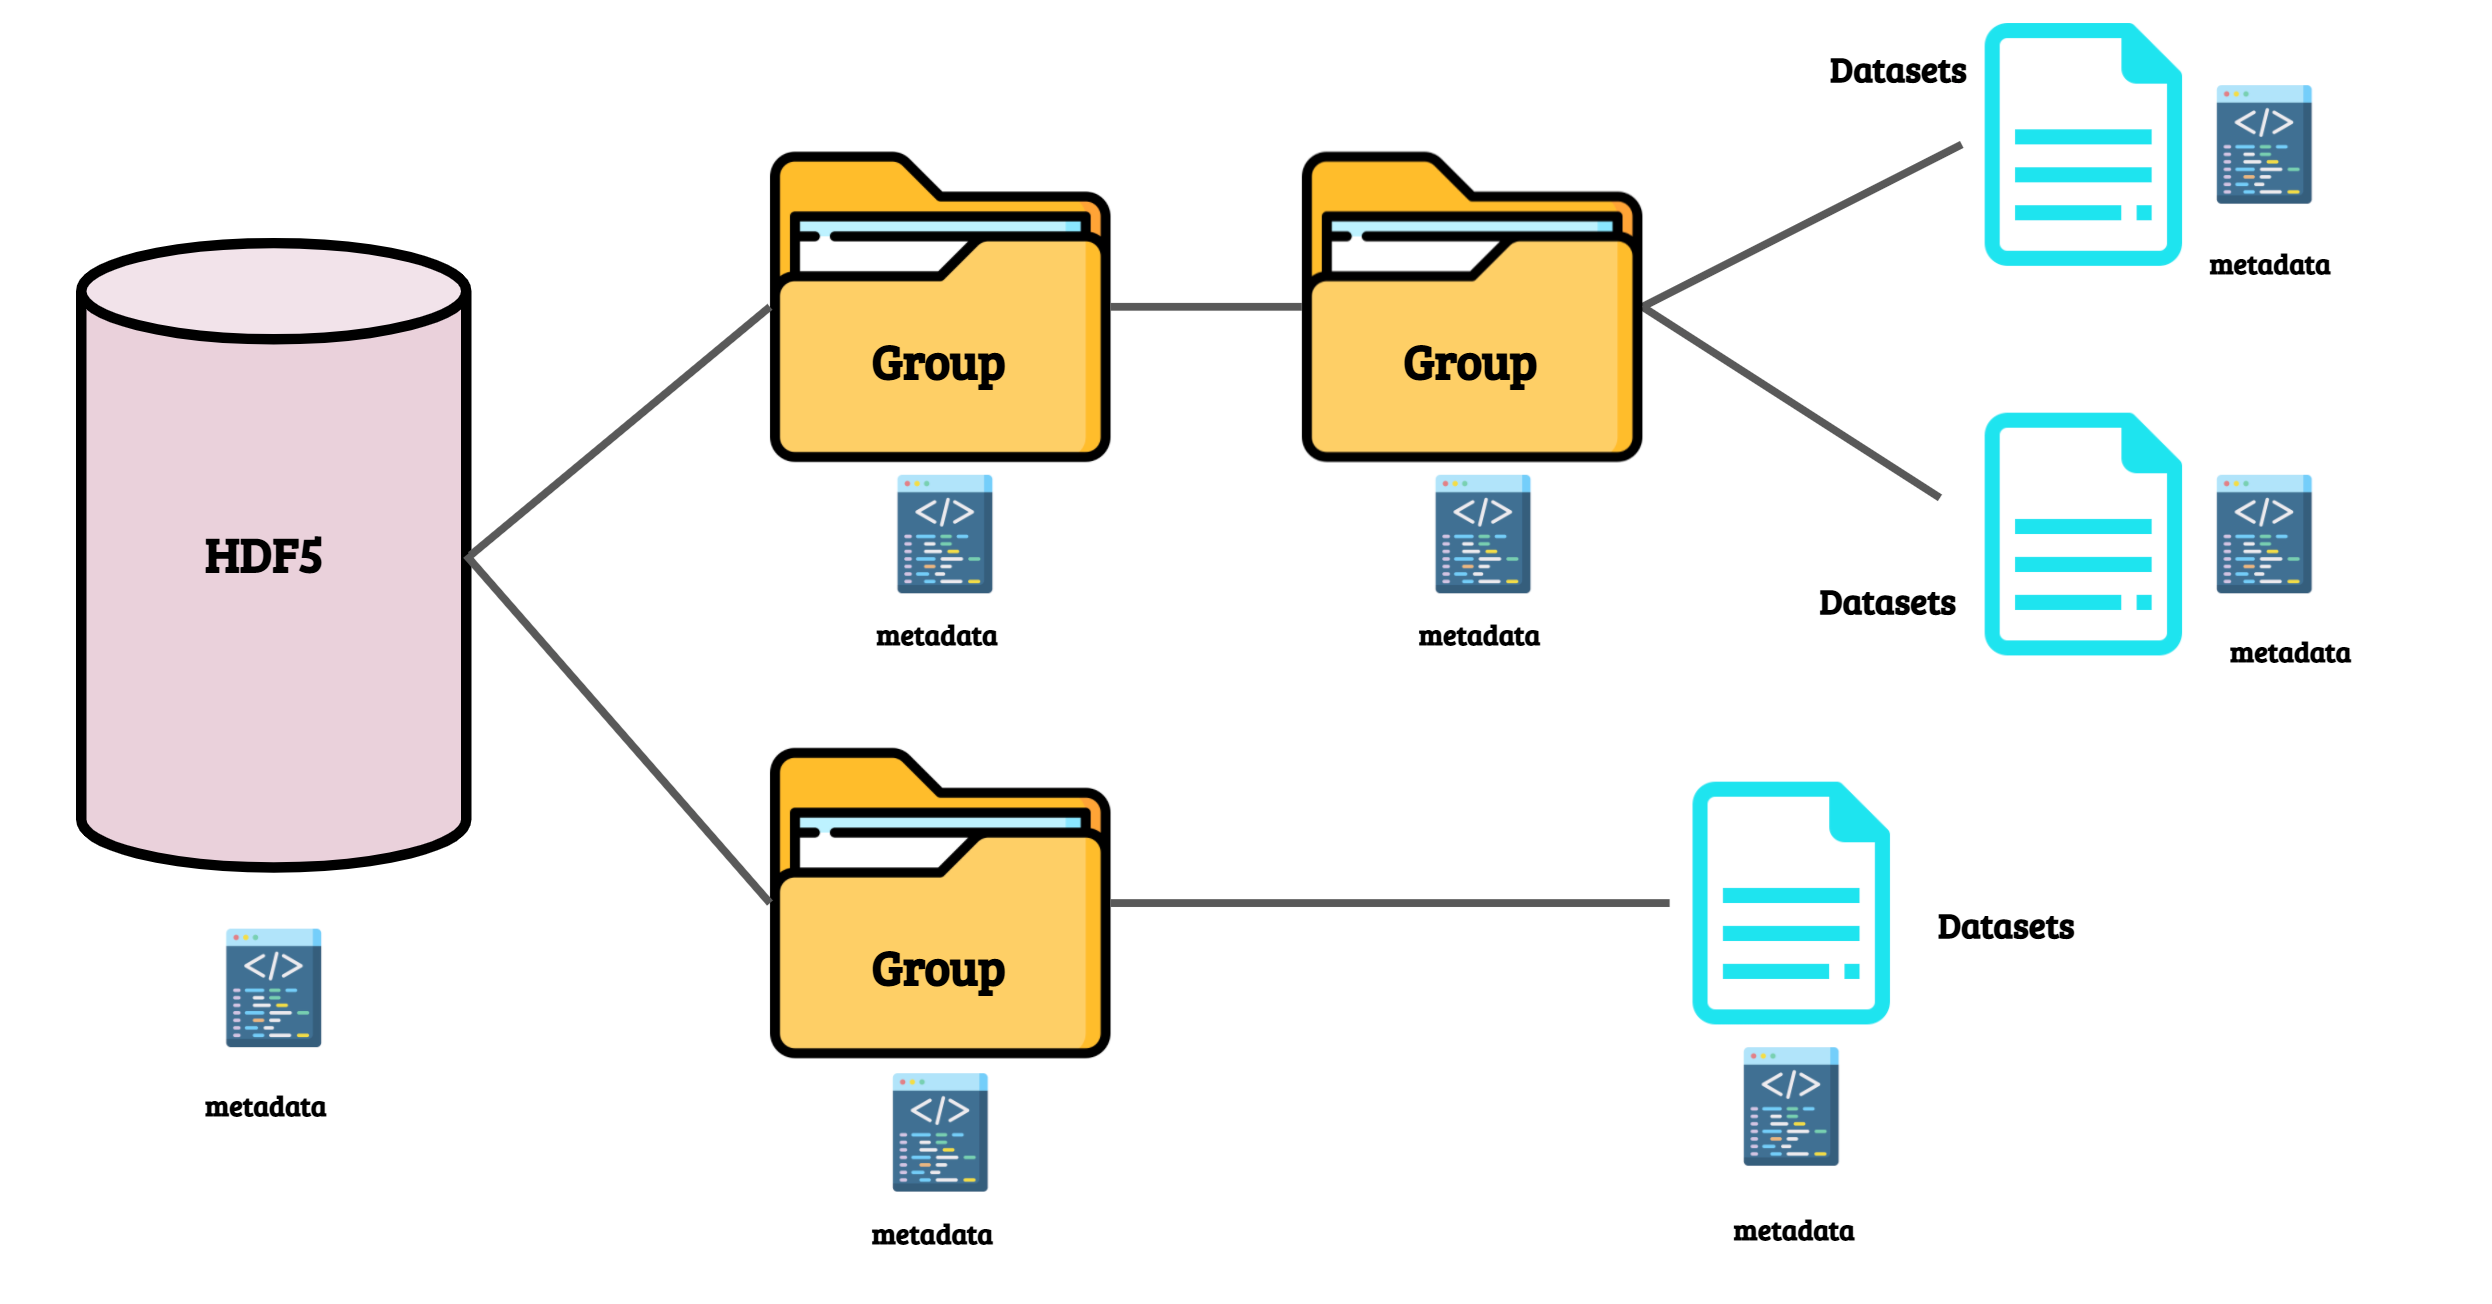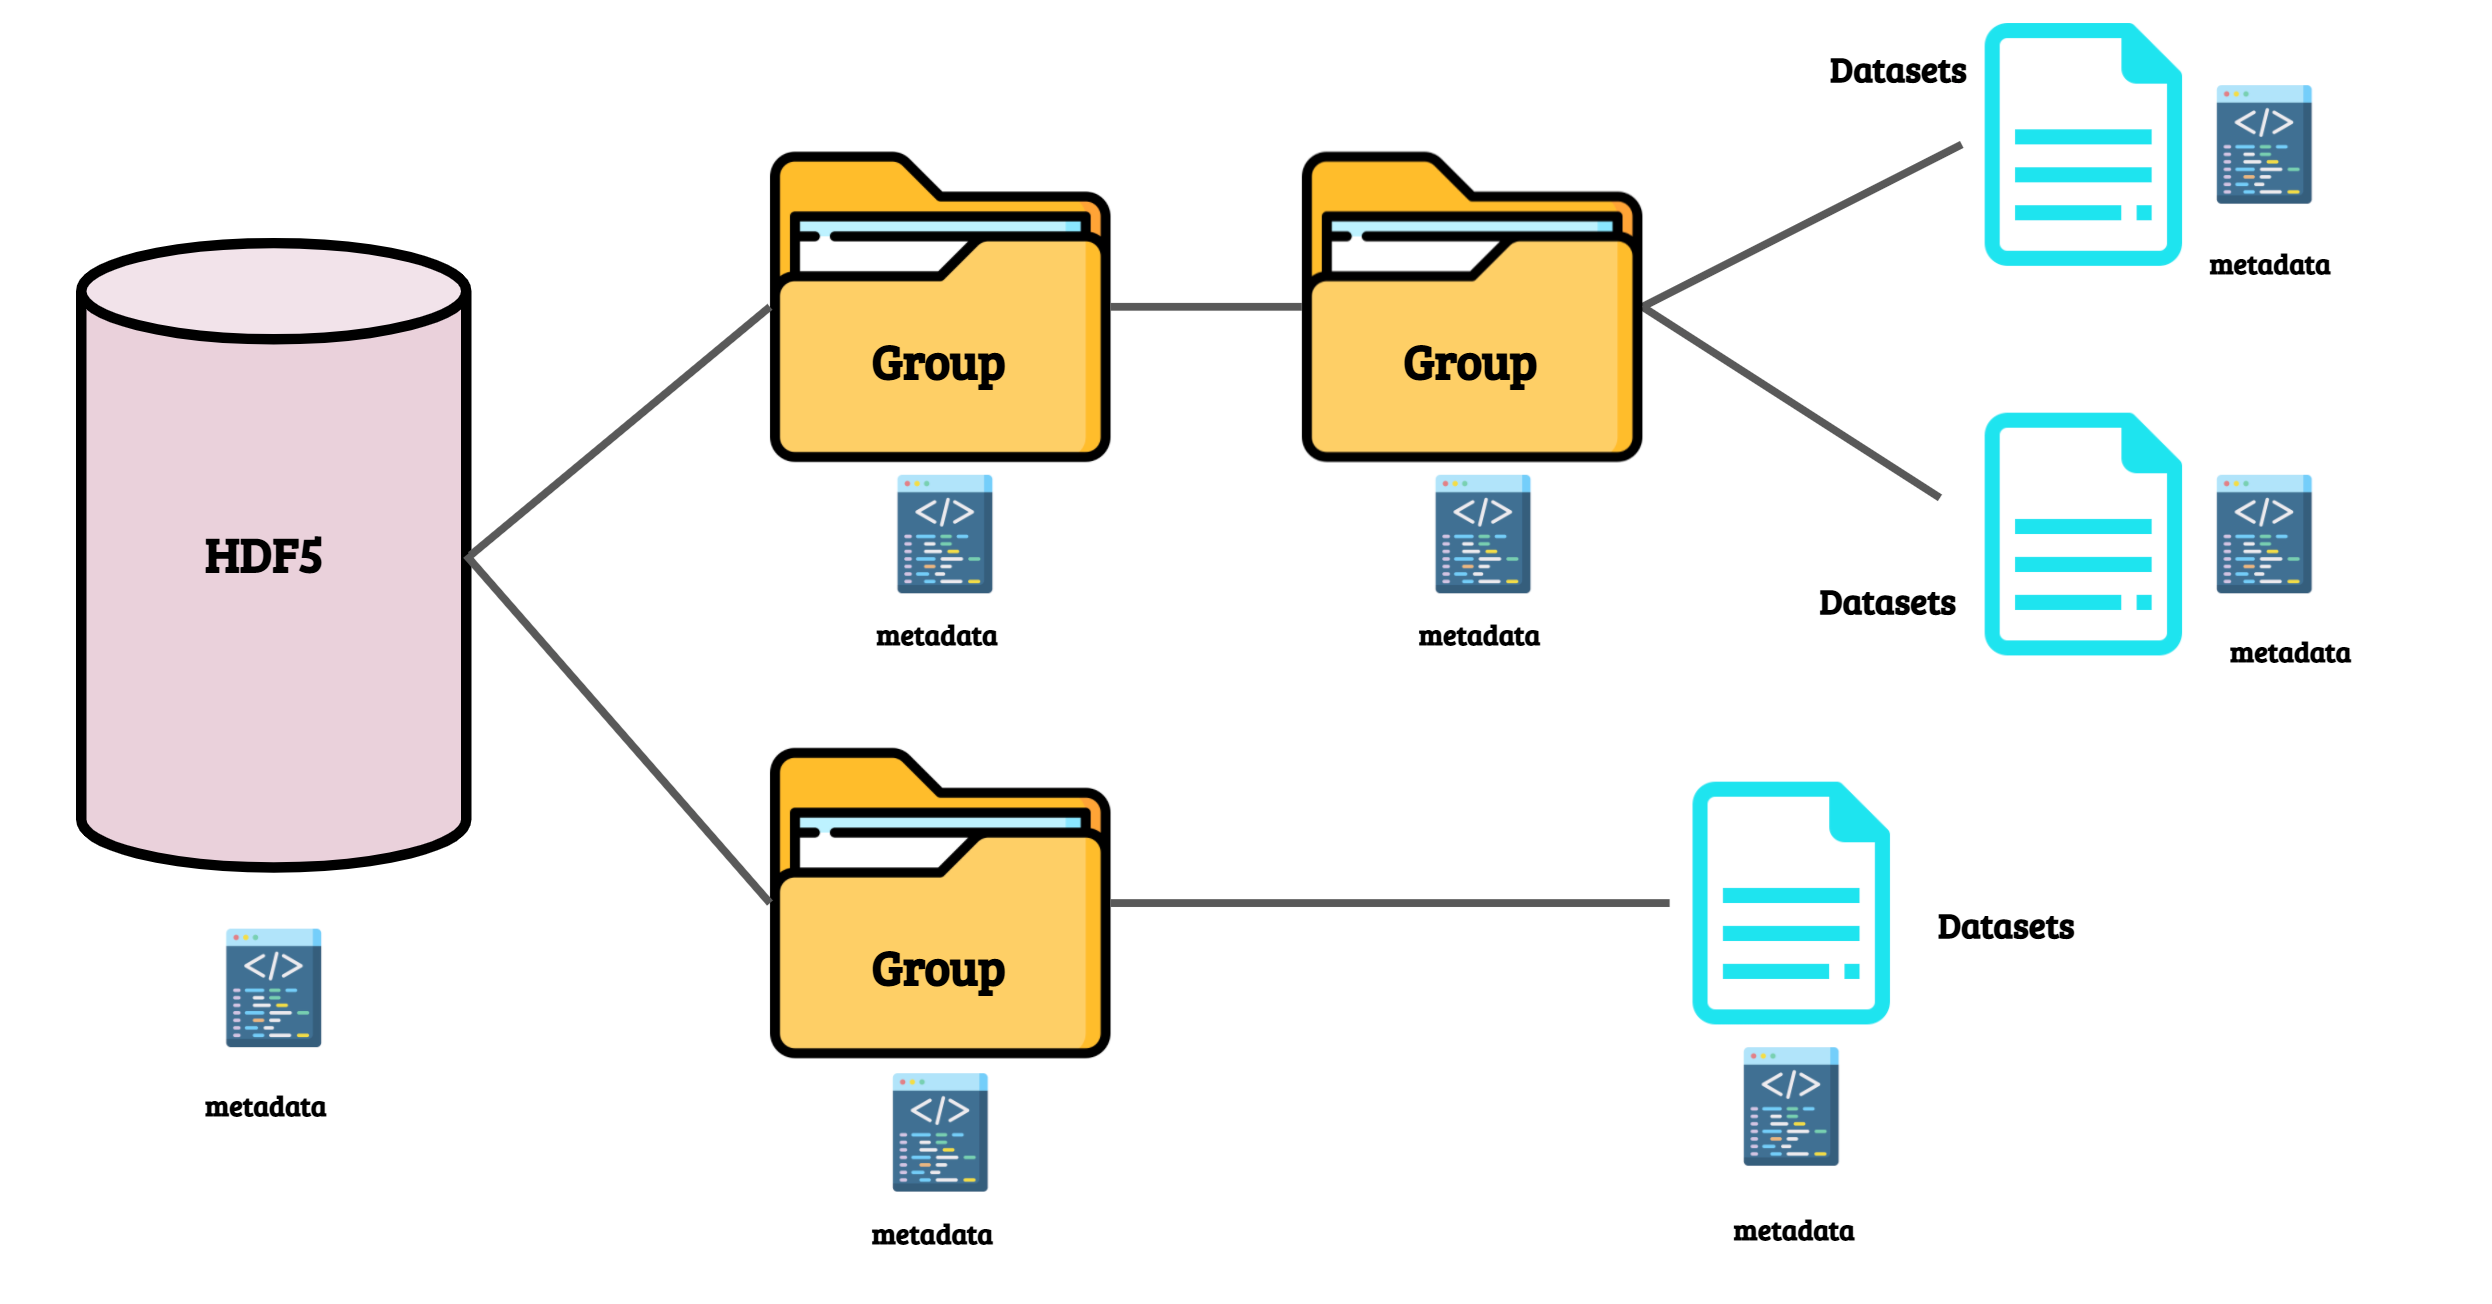

In [2]:
matrix1=np.random.random(size=(1000,1000))
matrix2=np.random.random(size=(1000,1000))

In [3]:
matrix1,matrix2

(array([[0.02369248, 0.63638414, 0.30571067, ..., 0.2105011 , 0.49451292,
         0.84036263],
        [0.05879274, 0.47017065, 0.44537198, ..., 0.80524353, 0.55656492,
         0.01659683],
        [0.40215869, 0.85464019, 0.59004884, ..., 0.45342543, 0.02193657,
         0.78617785],
        ...,
        [0.39648485, 0.33633599, 0.55592308, ..., 0.94092387, 0.58486996,
         0.79994203],
        [0.93546593, 0.95773336, 0.4160096 , ..., 0.98242271, 0.49275819,
         0.72595026],
        [0.787901  , 0.99781408, 0.61414928, ..., 0.02349377, 0.4987753 ,
         0.09190404]]),
 array([[0.48038122, 0.55168048, 0.13243413, ..., 0.83637905, 0.13832891,
         0.54357702],
        [0.25230408, 0.82451734, 0.98540912, ..., 0.5421745 , 0.14406789,
         0.44380086],
        [0.4299715 , 0.26774789, 0.14856983, ..., 0.47467608, 0.23432526,
         0.08116815],
        ...,
        [0.62249507, 0.77864734, 0.89595283, ..., 0.77610543, 0.47089355,
         0.17463685],
        [0.1

**How to create an safe HDF file!**

In [4]:
!pwd

/kaggle/working


In [5]:
import h5py  # Import the h5py library for working with HDF5 files

# Create a new HDF5 file in write mode
with h5py.File('/kaggle/working/demo.h5', 'w') as hdf:
    # Create a dataset named 'dataset1' and store the data from 'matrix1'
    hdf.create_dataset('dataset1', data=matrix1) #works as a key value pair dataset is key and data is value
    
    # Create another dataset named 'dataset2' and store the data from 'matrix2'
    hdf.create_dataset('dataset2', data=matrix2)

In [6]:
ls #the file has been created

demo.h5  __notebook__.ipynb


### How to read data from hdf file

In [7]:
with h5py.File('/kaggle/working/demo.h5','r') as hdf:
    print('this are the keys :',hdf.keys())
    ls=list(hdf.keys())
    print('this list contains keys :',ls)
    data=hdf.get(ls[0])
    print('this is a hdf dataset object: ',data)
    print('converting it to np array :', np.array(data))

this are the keys : <KeysViewHDF5 ['dataset1', 'dataset2']>
this list contains keys : ['dataset1', 'dataset2']
this is a hdf dataset object:  <HDF5 dataset "dataset1": shape (1000, 1000), type "<f8">
converting it to np array : [[0.02369248 0.63638414 0.30571067 ... 0.2105011  0.49451292 0.84036263]
 [0.05879274 0.47017065 0.44537198 ... 0.80524353 0.55656492 0.01659683]
 [0.40215869 0.85464019 0.59004884 ... 0.45342543 0.02193657 0.78617785]
 ...
 [0.39648485 0.33633599 0.55592308 ... 0.94092387 0.58486996 0.79994203]
 [0.93546593 0.95773336 0.4160096  ... 0.98242271 0.49275819 0.72595026]
 [0.787901   0.99781408 0.61414928 ... 0.02349377 0.4987753  0.09190404]]


# How to create groups and subgroups

In [8]:
#lets make sum sample data
matrix1=np.random.random(size=(1000,1000))
matrix2=np.random.random(size=(1000,1000))
matrix3=np.random.random(size=(1000,1000))
matrix4=np.random.random(size=(1000,1000))
matrix1,matrix2

(array([[0.82282553, 0.15277062, 0.90729635, ..., 0.29089012, 0.00749522,
         0.71460619],
        [0.48866322, 0.61539747, 0.78695766, ..., 0.19767476, 0.44934387,
         0.8820377 ],
        [0.89418842, 0.29731953, 0.85328486, ..., 0.06149189, 0.8223596 ,
         0.26017142],
        ...,
        [0.47203473, 0.38046904, 0.79854892, ..., 0.90684913, 0.1193579 ,
         0.28938005],
        [0.66837987, 0.0810856 , 0.28645352, ..., 0.67047466, 0.55280305,
         0.00764429],
        [0.69176485, 0.04741357, 0.43583479, ..., 0.16983802, 0.53560748,
         0.89957422]]),
 array([[0.09043589, 0.06831203, 0.74654996, ..., 0.91175585, 0.83373573,
         0.26535014],
        [0.30136614, 0.3244307 , 0.78274361, ..., 0.72080816, 0.67528101,
         0.45320343],
        [0.6488763 , 0.66411496, 0.34735742, ..., 0.74018949, 0.17076643,
         0.05890554],
        ...,
        [0.79426896, 0.05486953, 0.94402767, ..., 0.22086782, 0.94026857,
         0.44427772],
        [0.5

In [9]:
with h5py.File("/kaggle/working/hdf_grp.h5",'w') as hdf:
    G1=hdf.create_group('Group1')
    G1.create_dataset('dataset1',data=matrix1)
    G1.create_dataset('dataset4',data=matrix4)

    G21=hdf.create_group('Group2/SubGroup1')
    G21.create_dataset('dataset3',data=matrix3)

    G22=hdf.create_group('Group2/SubGroup2')
    G22.create_dataset('dataset2',data=matrix2)

In [10]:
!ls #hdf_grp has been created next we would see how to read them

demo.h5  hdf_grp.h5  __notebook__.ipynb


In [11]:
#accesing Group
with h5py.File("/kaggle/working/hdf_grp.h5",'r') as hdf:
    base_items= list(hdf.items())
    print('Items in the base directory ',base_items)
    G1=hdf.get('Group1')
    G1_items=list(G1)
    print('Items in G1',G1_items)
    dataset4=G1.get(G1_items[0])
    print(dataset4.shape)
    
     

Items in the base directory  [('Group1', <HDF5 group "/Group1" (2 members)>), ('Group2', <HDF5 group "/Group2" (2 members)>)]
Items in G1 ['dataset1', 'dataset4']
(1000, 1000)


In [12]:
#accesing SubGroup
with h5py.File("/kaggle/working/hdf_grp.h5",'r') as hdf:
    base_items= list(hdf.items())
    print('Items in the base directory ',base_items)
    G2=hdf.get('Group2')
    G2_items=list(G2)
    print('Items in G2',G2_items)
    G21=G2.get('/Group2/SubGroup1')
    G21_item=list(G21.items())
    print('items in group2 ,subgroup1',G21_item)
    dataset3=G21.get('dataset3')
    print('this is the dataset :',np.array(dataset3).shape)
    
    
     

Items in the base directory  [('Group1', <HDF5 group "/Group1" (2 members)>), ('Group2', <HDF5 group "/Group2" (2 members)>)]
Items in G2 ['SubGroup1', 'SubGroup2']
items in group2 ,subgroup1 [('dataset3', <HDF5 dataset "dataset3": shape (1000, 1000), type "<f8">)]
this is the dataset : (1000, 1000)


# How to create read write hdf file using pandas

In [13]:
import pandas as pd

hdf=pd.HDFStore('/kaggle/working/pandasHdfFile.h5','w')

In [14]:
#creating two pandas dataframe

data1 = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df1 = pd.DataFrame(data1)

# Create the second DataFrame (df2) with sample data about products
data2 = {
    'Product': ['Laptop', 'Phone', 'Tablet'],
    'Price': [1000, 500, 300],
    'Quantity': [10, 20, 15]
}
df2 = pd.DataFrame(data2)

# Display the DataFrames
print("DataFrame df1:")
print(df1)

print("\nDataFrame df2:")
print(df2)

DataFrame df1:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago

DataFrame df2:
  Product  Price  Quantity
0  Laptop   1000        10
1   Phone    500        20
2  Tablet    300        15


In [15]:
hdf.put('df1',df1,format='table',data_columns=True)
hdf.put('df2',df2,format='table',data_columns=True)
hdf.keys()

['/df1', '/df2']

In [16]:
hdf.get('df1')

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [17]:
hdf.close()